<a href="https://colab.research.google.com/github/CMU-IDS-2022/assignment-2-dtk2/blob/master/streamlit_app_dtk2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Data Visualization, Sustainable Development Goal: Clean Water & Sanitation** 

In [18]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import altair as alt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

alt.data_transformers.disable_max_rows()
!pip install pyngrok
PAGE_CONFIG = {"page_title":"Assignment2.io","layout":"centered"}
st.set_page_config(**PAGE_CONFIG)

Mounted at /content/drive


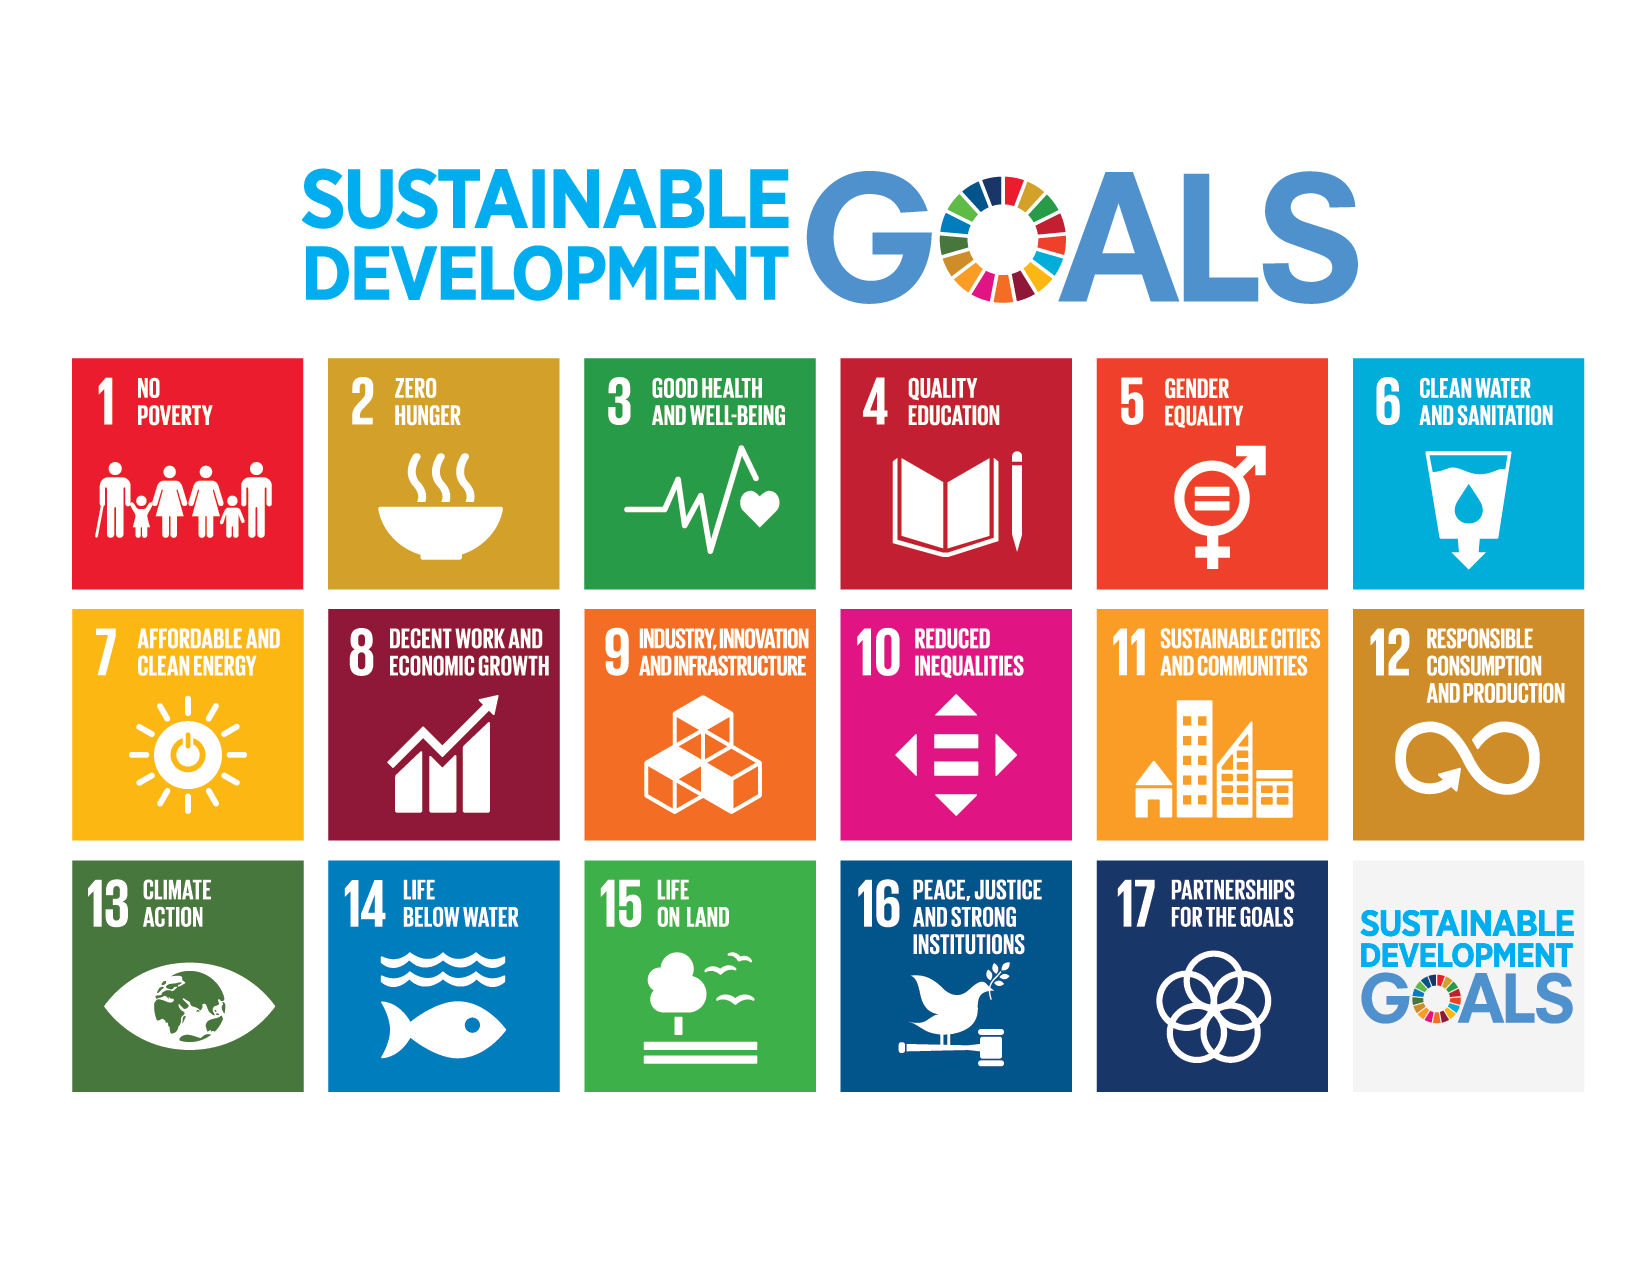

In [1]:
from IPython.display import Image

Image('https://aer.eu/wp-content/uploads/2019/06/E_2018_SDG_Poster_without_UN_emblem_Letter-US.png', height=500)

# Calling Packages

# Importing and Data Cleaning

In [3]:
waterdf = pd.read_csv("https://raw.githubusercontent.com/CMU-IDS-2022/assignment-2-dtk2/master/water.csv", on_bad_lines='skip', encoding = "ISO-8859-1")
sanitdf = pd.read_csv('/content/drive/MyDrive/SPRING 2022 COURSES/05-839 Interactive Data Science/Assignments/Assignment 3/DATA/sanitation.csv', encoding = "ISO-8859-1")

In [4]:
print(waterdf.shape)
print(waterdf.describe())
print(waterdf.isna().sum())

(4914, 17)
                Sl         YEAR   PC_POP_URB  BASIC_WAT_NAT  LIMITED_WAT_NAT  \
count  4914.000000  4914.000000  4895.000000    4712.000000      4712.000000   
mean   2457.500000  2010.000000    59.374872      86.624576         3.318548   
std    1418.693942     6.055917    25.327931      17.565651         5.835152   
min       1.000000  2000.000000     0.000000      18.000000         0.000000   
25%    1229.250000  2005.000000    39.000000      81.000000         0.000000   
50%    2457.500000  2010.000000    60.000000      95.000000         0.000000   
75%    3685.750000  2015.000000    80.000000      99.000000         5.000000   
max    4914.000000  2020.000000   100.000000      99.000000        37.000000   

       UNIMPROVED_WAT_NAT  SURFACE_WAT_NAT  SAFELY_MANAGED_NAT  \
count         4712.000000      4620.000000         2889.000000   
mean             6.442063         3.233117           71.707165   
std              9.434917         6.255025           30.024241   
min 

In [5]:
waterdf = waterdf.dropna(subset=['POP_THOUS'])
#waterdf = waterdf.fillna(0)
print(waterdf.shape)
waterdf.isnull().sum()

(4895, 17)


Sl                          0
COUNTRY                     0
C_CODE                      0
YEAR                        0
POP_THOUS                   0
PC_POP_URB                  0
BASIC_WAT_NAT             183
LIMITED_WAT_NAT           183
UNIMPROVED_WAT_NAT        183
SURFACE_WAT_NAT           275
SAFELY_MANAGED_NAT       2006
ACCESS_ONPREMISE_NAT      195
AVAIL_WHEN_NEEDED_NAT    2230
NON_CONTAMIN_NAT         2006
PIPED_NAT                 317
NONPIPED_NAT              322
SDG region                  0
dtype: int64

In [6]:
waterdf.describe()

Sl         YEAR   PC_POP_URB  BASIC_WAT_NAT  LIMITED_WAT_NAT  \
count  4895.000000  4895.000000  4895.000000    4712.000000      4712.000000   
mean   2452.442697  2010.024311    59.374872      86.624576         3.318548   
std    1418.643898     6.052085    25.327931      17.565651         5.835152   
min       1.000000  2000.000000     0.000000      18.000000         0.000000   
25%    1224.500000  2005.000000    39.000000      81.000000         0.000000   
50%    2448.000000  2010.000000    60.000000      95.000000         0.000000   
75%    3677.500000  2015.000000    80.000000      99.000000         5.000000   
max    4914.000000  2020.000000   100.000000      99.000000        37.000000   

       UNIMPROVED_WAT_NAT  SURFACE_WAT_NAT  SAFELY_MANAGED_NAT  \
count         4712.000000      4620.000000         2889.000000   
mean             6.442063         3.233117           71.707165   
std              9.434917         6.255025           30.024241   
min              0.000000         0.000000            2.000000   
25%              0.000000         0.000000           50.000000   
50%              2.000000         0.000000           85.000000   
75%              9.000000         4.000000           97.000000   
max             57.000000        46.000000           99.000000   

       ACCESS_ONPREMISE_NAT  AVAIL_WHEN_NEEDED_NAT  NON_CONTAMIN_NAT  \
count           4700.000000            2665.000000       2889.000000   
mean              74.577234              72.949343         77.416061   
std               29.600615              20.184827         26.966134   
min                0.000000              16.000000          7.000000   
25%               58.000000              58.000000         56.000000   
50%               89.000000              76.000000         93.000000   
75%               98.000000              90.000000         99.000000   
max               99.000000              99.000000         99.000000   

         PIPED_NAT  NONPIPED_NAT  
count  4578.000000   4573.000000  
mean     72.756662     17.046796  
std      27.999067     18.858222  
min       4.000000      0.000000  
25%      49.000000      1.000000  
50%      85.000000     10.000000  
75%      97.000000     28.000000  
max      99.000000     88.000000

In [7]:
waterdf['POP_THOUS'] = waterdf['POP_THOUS'].str.replace(' ', '')
waterdf['POP_THOUS'] = waterdf['POP_THOUS'].astype(int)
waterdf.dtypes

Sl                         int64
COUNTRY                   object
C_CODE                    object
YEAR                       int64
POP_THOUS                  int64
PC_POP_URB               float64
BASIC_WAT_NAT            float64
LIMITED_WAT_NAT          float64
UNIMPROVED_WAT_NAT       float64
SURFACE_WAT_NAT          float64
SAFELY_MANAGED_NAT       float64
ACCESS_ONPREMISE_NAT     float64
AVAIL_WHEN_NEEDED_NAT    float64
NON_CONTAMIN_NAT         float64
PIPED_NAT                float64
NONPIPED_NAT             float64
SDG region                object
dtype: object

In [8]:
waterdf.head()

Sl      COUNTRY C_CODE  YEAR  POP_THOUS  PC_POP_URB  BASIC_WAT_NAT  \
0   1  Afghanistan    AFG  2000      20780        22.0           28.0   
1   2  Afghanistan    AFG  2001      21607        22.0           28.0   
2   3  Afghanistan    AFG  2002      22601        22.0           30.0   
3   4  Afghanistan    AFG  2003      23681        22.0           32.0   
4   5  Afghanistan    AFG  2004      24727        22.0           34.0   

   LIMITED_WAT_NAT  UNIMPROVED_WAT_NAT  SURFACE_WAT_NAT  SAFELY_MANAGED_NAT  \
0              4.0                43.0             25.0                11.0   
1              4.0                43.0             25.0                11.0   
2              4.0                42.0             24.0                12.0   
3              4.0                40.0             23.0                13.0   
4              5.0                39.0             22.0                13.0   

   ACCESS_ONPREMISE_NAT  AVAIL_WHEN_NEEDED_NAT  NON_CONTAMIN_NAT  PIPED_NAT  \
0                  15.0                    NaN              11.0        4.0   
1                  15.0                    NaN              11.0        4.0   
2                  16.0                    NaN              12.0        4.0   
3                  17.0                    NaN              13.0        5.0   
4                  18.0                    NaN              14.0        6.0   

   NONPIPED_NAT                 SDG region  
0          28.0  Central and Southern Asia  
1          28.0  Central and Southern Asia  
2          30.0  Central and Southern Asia  
3          32.0  Central and Southern Asia  
4          33.0  Central and Southern Asia

# SDG Regions

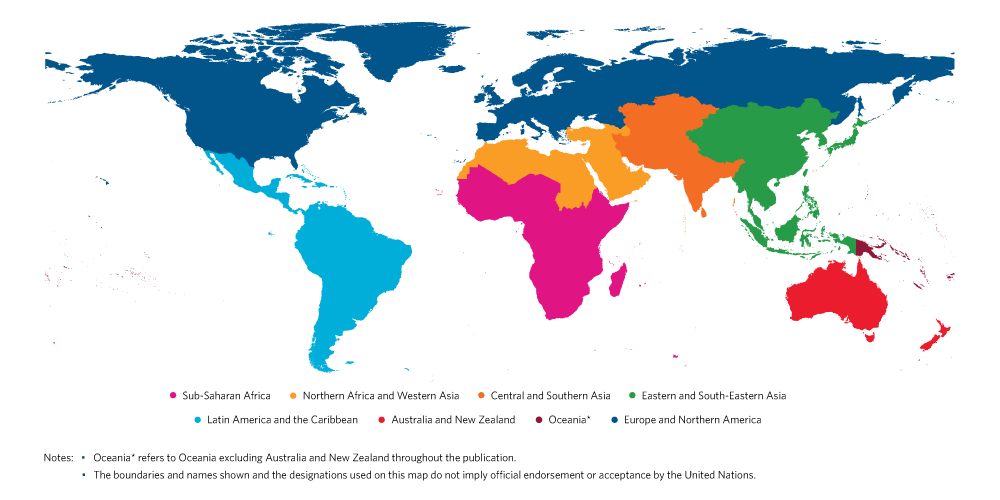

In [9]:
Image('https://unstats.un.org/sdgs/assets/img/sliders/2017-Regions-E-large.png')

In [10]:
#Correlation Matrix
cor_data = (waterdf[['BASIC_WAT_NAT', 	'LIMITED_WAT_NAT', 	'UNIMPROVED_WAT_NAT', 	'SURFACE_WAT_NAT', 	'SAFELY_MANAGED_NAT', 	'ACCESS_ONPREMISE_NAT', 	'AVAIL_WHEN_NEEDED_NAT', 	
                    'NON_CONTAMIN_NAT', 	'PIPED_NAT', 	'NONPIPED_NAT']]
            ).corr().stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'variable1', 'level_1': 'variable2'})

cor_data['correlation_label'] = cor_data['correlation'].map('{:.2f}'.format)  # Round to 2 decimal
#print(cor_data)

base = alt.Chart(cor_data).encode(
    x='variable2:O',
    y='variable1:O'    
)

# Text layer with correlation labels
# Colors are for easier readability
text = base.mark_text().encode(
    text='correlation_label',
    color=alt.condition(
        alt.datum.correlation > 0.1, 
        alt.value('black'),
        alt.value('white')
    )
)

# The correlation heatmap
cor_plot = base.mark_rect().encode(
    
    color=alt.Color('correlation:Q', scale=alt.Scale(scheme='plasma'))
).properties(
    width=500,
    height=500,
    title="The Correlation Matrix: Drinking Water"
)

cor_plot + text

alt.LayerChart(...)

In [11]:
waterpie = waterdf[['COUNTRY','POP_THOUS','YEAR','BASIC_WAT_NAT','LIMITED_WAT_NAT','UNIMPROVED_WAT_NAT','SURFACE_WAT_NAT']]
#waterpie = waterpie[waterpie['YEAR']==2020]
waterpie
waterpie_melt = pd.melt(waterpie, id_vars=['COUNTRY','YEAR','POP_THOUS'], value_vars=['BASIC_WAT_NAT','LIMITED_WAT_NAT','UNIMPROVED_WAT_NAT','SURFACE_WAT_NAT'])
waterpie

COUNTRY  POP_THOUS  YEAR  BASIC_WAT_NAT  LIMITED_WAT_NAT  \
0     Afghanistan      20780  2000           28.0              4.0   
1     Afghanistan      21607  2001           28.0              4.0   
2     Afghanistan      22601  2002           30.0              4.0   
3     Afghanistan      23681  2003           32.0              4.0   
4     Afghanistan      24727  2004           34.0              5.0   
...           ...        ...   ...            ...              ...   
4909     Zimbabwe      14030  2016           64.0             13.0   
4910     Zimbabwe      14237  2017           64.0             13.0   
4911     Zimbabwe      14439  2018           64.0             14.0   
4912     Zimbabwe      14645  2019           63.0             14.0   
4913     Zimbabwe      14863  2020           63.0             14.0   

      UNIMPROVED_WAT_NAT  SURFACE_WAT_NAT  
0                   43.0             25.0  
1                   43.0             25.0  
2                   42.0             24.0  
3                   40.0             23.0  
4                   39.0             22.0  
...                  ...              ...  
4909                16.0              7.0  
4910                16.0              7.0  
4911                16.0              7.0  
4912                16.0              7.0  
4913                16.0              7.0  

[4895 rows x 7 columns]

In [12]:
waterpie_melt
waterpie_melt.isna().sum()

COUNTRY        0
YEAR           0
POP_THOUS      0
variable       0
value        824
dtype: int64

In [13]:
slider = alt.binding_range(min=2000, max=2020, step=1, name='YEAR')
select_year = alt.selection_single(name="YEAR", fields=['YEAR'],
                                   bind=slider, init={'YEAR': 2000})


popsdgchart = alt.Chart(waterdf).mark_bar(tooltip=True).encode(
    
    y = alt.Y('POP_THOUS',
              axis=alt.Axis(title='Population (in 1000s)'), sort='-x',
              scale=alt.Scale(domain=(0, 2400000))),
    
    x = alt.X('SDG region:O',
              axis=alt.Axis(title='SDG Regions'), 
              scale=alt.Scale(zero=False), sort='y'
              ),
              
    color= alt.Color('COUNTRY:O', legend = None, scale=alt.Scale(scheme='plasma'))
).properties(
    width = 400,
    height = 400,
    title="Population (2000-2020): SDG Regions"
).transform_filter(
    select_year
).add_selection(
    select_year
)

popyearchart = alt.Chart(waterdf).mark_bar(tooltip=True).encode(
    
    y = alt.Y('POP_THOUS',
              axis=alt.Axis(title='Population (in 1000s)'), sort='-x',
              scale=alt.Scale(domain=(0, 1600000))),
                  
    x = alt.X('COUNTRY:O',
              axis=alt.Axis(title='Countries'), 
              scale=alt.Scale(zero=False), sort='-y'
              ),  
    color= alt.Color('COUNTRY', legend = None, scale=alt.Scale(scheme='plasma'))
).transform_filter(
    select_year
).add_selection(
    select_year
).transform_filter(
    alt.datum.POP_THOUS > 40000
).properties(
    width = 400,
    height = 400,
    title="Population (2000-2020): World Nations"
)
###

alt.concat(
    popsdgchart, popyearchart
).resolve_scale(
    color='independent'
).configure_view(
    stroke=None
) 

alt.ConcatChart(...)

In [14]:
selection = alt.selection_single(fields=['YEAR','COUNTRY'])

###
pipedwaterchart = alt.Chart(waterdf).mark_circle(opacity=0.9).encode(
    x=alt.X('YEAR:O', axis=alt.Axis(title='Year')),
    y=alt.Y('PIPED_NAT', axis=alt.Axis(title='% Population with Piped Water Connections')),
    size='POP_THOUS',
    #shape='SDG region',
    color = alt.Color('COUNTRY', scale=alt.Scale(scheme='plasma')),
    tooltip='COUNTRY'
).add_selection(selection).encode(
    color=alt.condition(selection, "COUNTRY", alt.value("grey"), legend=None, scale=alt.Scale(scheme='plasma'))
).properties(
    title="Increase in Access to Piped Water Connections over Time",
    width=800
)
###

nationpie = alt.Chart(waterpie_melt).mark_arc().encode(
    theta=alt.Theta(field='mean_value', type="quantitative"),
    color=alt.Color('variable', scale=alt.Scale(scheme='plasma')),
    tooltip=('variable:O', 'mean_value:Q', 'COUNTRY:O', 'YEAR:O')
).transform_filter(
    selection
).transform_aggregate(
    mean_value='mean(value):Q',
    groupby=["variable"]
).properties(
    title="Access to Drinking Water"
)

alt.hconcat(
    pipedwaterchart , nationpie
).resolve_scale(
    color='independent'
).configure_view(
    stroke=None
) 

alt.HConcatChart(...)

In [15]:
slider = alt.binding_range(min=2000, max=2020, step=1, name='YEAR')
select_year = alt.selection_single(name="YEAR", fields=['YEAR'],
                                   bind=slider, init={'YEAR': 2000})
## NSCM - Non Contaminated VS Safely Managed
NCSM = alt.Chart(waterdf).mark_circle(opacity=0.9).encode(
    
    x = alt.X('SAFELY_MANAGED_NAT'),
    y = alt.Y('NON_CONTAMIN_NAT'),
    color=alt.Color('SDG region:O',scale=alt.Scale(scheme='plasma')),
    size='POP_THOUS:Q',
    tooltip=('COUNTRY', 'SDG region')
).transform_filter(
    select_year
).add_selection(
    select_year
).properties(
    title="Safely Managed Non Contaminated Drinking Water"
)
## NCNP Non Contaminated VS NON Piped
NCNP = alt.Chart(waterdf).mark_circle(opacity=0.9).encode(
    
    x = alt.X('NONPIPED_NAT'),
    y = alt.Y('NON_CONTAMIN_NAT'),
    color=alt.Color('SDG region:O',scale=alt.Scale(scheme='plasma')),
    size='POP_THOUS:Q',
    tooltip=('COUNTRY', 'SDG region')
).transform_filter(
    select_year
).add_selection(
    select_year
).properties(
    title="Non Piped Access to Non Contaminated Drinking Water"
)
## NCP Non Contaminated VS Piped
NCP = alt.Chart(waterdf).mark_circle(opacity=0.9).encode(
    
    x = alt.X('PIPED_NAT',),
    y = alt.Y('NON_CONTAMIN_NAT'),
    color=alt.Color('SDG region:O',scale=alt.Scale(scheme='plasma')),
    size='POP_THOUS:Q',
    tooltip=('COUNTRY', 'SDG region')
).transform_filter(
    select_year
).add_selection(
    select_year
).properties(
    title="Piped Access to Non Contaminated Drinking Water"
)

worldpop = alt.Chart(waterdf).mark_bar().encode(
    x="YEAR:O",
    y=alt.Y("sum(POP_THOUS):Q",scale=alt.Scale(domain=(0,8000000)),axis=alt.Axis(title='World Population (in 1000s)')),
    color=alt.Color('YEAR:N', scale=alt.Scale(scheme='plasma', zero=False)),
    tooltip = 'YEAR'
).transform_filter(
    select_year
).add_selection(
    select_year
)

alt.hconcat(
    worldpop, NCSM , NCNP, NCP
).resolve_scale(
    color='shared'
).configure_view(
    stroke=None
) 


alt.HConcatChart(...)

In [16]:
import streamlit as st
st.title("Household Pulse Explorable")

2022-02-25 20:44:46.820 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)